In [20]:
import numpy as np
import scipy.signal
from ipywidgets import interact
from matplotlib import pyplot as plt

In [50]:
@interact(
    duty_cycle=(0., 1., 0.01),
    shift=(0., np.pi, 0.1),
    freq=(0., 20., 0.1),
)
def f(
    duty_cycle=0.5,
    freq=1.,
    shift=0.,
):
    t_vals = np.linspace(0, 1, 100)
    y_vals = scipy.signal.square(t_vals * 2 * np.pi - np.pi/2 - shift, duty_cycle)
    #y_vals = np.sin(t_vals * 2 * np.pi * freq - np.pi/2 - shift)

    fig = plt.figure(figsize=(20, 6))

    ax0, ax1, ax2, ax3 = fig.subplots(1, 4)
    ax0.plot(t_vals, y_vals)
    
    a_vals = np.fft.fft(y_vals, 8192)
    ax1.plot(a_vals.real, a_vals.imag)
    
    ax2.plot(abs(a_vals))
    
    ax3.plot(np.angle(a_vals))

interactive(children=(FloatSlider(value=0.5, description='duty_cycle', max=1.0, step=0.01), FloatSlider(value=…

In [27]:
scipy.signal.cosine?

Signature: scipy.signal.cosine(*args, **kwargs)
Docstring:
Return a window with a simple cosine shape.

.. warning:: scipy.signal.cosine is deprecated,
             use scipy.signal.windows.cosine instead.

Parameters
----------
M : int
    Number of points in the output window. If zero or less, an empty
    array is returned.
sym : bool, optional
    When True (default), generates a symmetric window, for use in filter
    design.
    When False, generates a periodic window, for use in spectral analysis.

Returns
-------
w : ndarray
    The window, with the maximum value normalized to 1 (though the value 1
    does not appear if `M` is even and `sym` is True).

Notes
-----

.. versionadded:: 0.13.0

Examples
--------
Plot the window and its frequency response:

>>> from scipy import signal
>>> from scipy.fft import fft, fftshift
>>> import matplotlib.pyplot as plt

>>> window = signal.cosine(51)
>>> plt.plot(window)
>>> plt.title("Cosine window")
>>> plt.ylabel("Amplitude")
>>> plt.xla

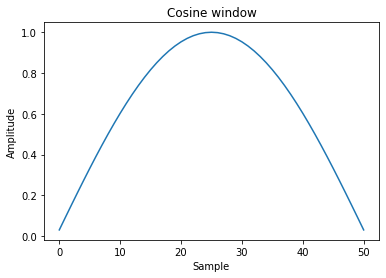

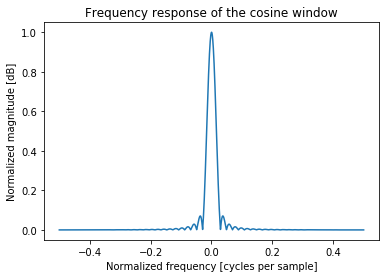

array([1.27344087, 1.27270232, 1.27048855, ..., 1.26680519, 1.27048855,
       1.27270232])

In [33]:
from scipy import signal
from scipy.fft import fft, fftshift
import matplotlib.pyplot as plt

window = signal.cosine(51)
plt.plot(window)
plt.title("Cosine window")
plt.ylabel("Amplitude")
plt.xlabel("Sample")

plt.figure()
A = fft(window, 2048) / (len(window)/2.0)
freq = np.linspace(-0.5, 0.5, len(A))
#response = 20 * np.log10(np.abs(fftshift(A / abs(A).max())))
response = np.abs(fftshift(A / abs(A).max()))
plt.plot(freq, response)
#plt.axis([-0.5, 0.5, -120, 0])
plt.title("Frequency response of the cosine window")
plt.ylabel("Normalized magnitude [dB]")
plt.xlabel("Normalized frequency [cycles per sample]")
plt.show()